In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import numdifftools as nd
from sklearn import preprocessing
from numpy import linalg as LA
import random
from numpy import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [132]:
df = pd.read_csv(r'Assignment5Dataset.csv')
# df=df.drop(df.columns[2],axis = 1)
data = df.to_numpy()
import sys
import numpy


[[ 17.19063348 -26.58104745]
 [  7.64676407 -19.60231098]
 [  7.57107259 -17.44564041]
 ...
 [  5.7503812  -10.45513605]
 [ 15.6248357  -23.20150458]
 [  4.41392536  -8.24270865]]


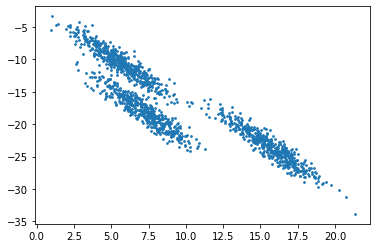

In [157]:
X,y =make_blobs(n_samples = 1500 ,random_state =150)
X.shape


trans = [[1.4574,-2.654],[-0.784,0.397]]
X = np.dot(X,trans)
plt.scatter(X[:,0],X[:,1],s=3)
data = X
print(data)

In [254]:

def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.

    Arguments:
        i runs from 0 to 96
        spiral_num is 1 or -1
    """
    φ = i/16 * math.pi
    r = 6.5 * ((144 - i)/104)
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return x, y

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(500)]
data= np.array(spiral(0.5))
data2=np.array(spiral(-0.5))
data=np.append(data,data2,axis=0)

In [255]:

x1 = data[:,0]
x2 = data[:,1]
data.shape[0]

1000

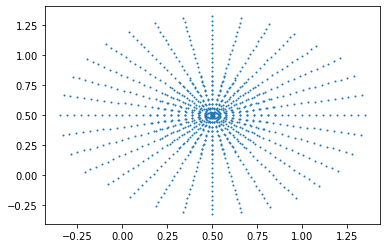

In [256]:
plt.scatter(x1, x2,s = 1, marker='o');

In [223]:
def plotmatrix(A,mean,cluster,data):
    rep = [  [[],[]] for i in range(cluster) ]
    for i in range(A.shape[0]):
        for cl in range(cluster):
            if(A[i][cl]==1):
                rep[cl][0].append(data[i][0])
                rep[cl][1].append(data[i][1])
                break
    colors = {0:"red",1:"blue",2:"silver",3:"gold" ,4:"yellow" , 5:"orange",} 
    
   
    for j in range(cluster):
        plt.scatter(rep[j][0],rep[j][1],s=1,c=colors[j]);
        
    for m in range(cluster):
        plt.scatter(mean[m][0],mean[m][1],s=30,c='black',marker='^')
    plt.show()


In [224]:
def plotEasy(A,mean,cluster,data):
    y = [ 0 for i in range(A.shape[0])]

    for i in range(A.shape[0]):
        for cl in range(cluster):
            if(A[i][cl]==1):
                y[i] = cl
    colors = {0:"red",1:"blue",2:"silver",3:"gold" ,4:"yellow" , 5:"orange",} 
#     for m in range(cluster):
#         plt.scatter(mean[m][0],mean[m][1],s=30,c='black',marker='^')
#     for i in range(A.shape[0]):
#         plt.scatter(data[i][0],data[i][1],s=1,c=colors[y[i]])
#     plt.show()
    return y
        

In [225]:
def change(A,mean,cluster,data):
    A = np.zeros((data.shape[0],cluster))
    for i in range(data.shape[0]):
        mindist = math.inf
        ind = 0
        for j in range(cluster):
            dist = LA.norm(data[i]-mean[j])
            if(dist < mindist):
                ind = j
                mindist = dist
        for j in range(cluster):
            if(j==ind):
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A            

In [226]:
def Kmean(cluster,data):
    print("shjape =", data.shape[1])
    mean = np.zeros((cluster,data.shape[1]))
    for i in range(cluster):
#         for j in range(data.shape[1]):
#             mean[i][j] = random.randint(-1,1)
        mean[i] = data[(i*cluster+667)%1500]
#         mean[i] = random.uniform(low = -10,high=10 ,size=data.shape[1])
    A = np.zeros((data.shape[0],cluster))
    A = change(A,mean,cluster,data)
    belongs = [0 for i in range(data.shape[0])]
    itr = 0
    while True:
        itr+=1

        avg_mean = np.zeros((cluster,data.shape[1]))

        cnt = [0 for i in range(cluster)]
        for r in range(data.shape[0]):
            for j in range(cluster):
                if A[r][j]==1:
                    avg_mean[j] += data[r]
                    cnt[j]+=1

        for j in range(cluster):
            avg_mean[j] = avg_mean[j]/cnt[j]

        mean = avg_mean
  
        belongs = plotEasy(A,mean,cluster,data)
        old_A = A
        A  = change(A,mean,cluster,data)
        if((old_A==A).all()):
            print(itr)
            break
 
    return belongs

In [227]:
# Kmean(5,data)

In [228]:

def Spectral(eps,cluster,gamma):
    new_data = np.zeros((data.shape[0],cluster))
    W = np.zeros((data.shape[0],data.shape[0]))
    D = np.zeros((data.shape[0],data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0] ):
            if(i!=j):
                W[i][j] = math.exp(-gamma*LA.norm(data[i]-data[j])**2)
                W[j][i] = W[i][j]
                
    d = np.array(W.sum(axis=1)).ravel()
    D = np.diag(d)
    L = D-W
     
    Dh = np.linalg.inv(np.sqrt(D))
    L = np.dot(Dh,np.dot(L,Dh))
    
    e_val ,e_vec = LA.eigh(L)
    for i in range(cluster):
        vec = e_vec[:,i]
        for j in range(data.shape[0]):
            new_data[j][i] = vec[j]
#     print(new_data)
    new_data = preprocessing.normalize(new_data, axis=0)
#     print(new_data)
    belon = Kmean(cluster,new_data)
    colors = {0:"red",1:"blue",2:"silver",3:"gold" ,4:"yellow" , 5:"orange",} 
    for i in range(data.shape[0]):
        plt.scatter(data[i][0],data[i][1],s=1,c=colors[belon[i]] )
#     print(sec_ev)
    
    plt.show()

shjape = 2
11


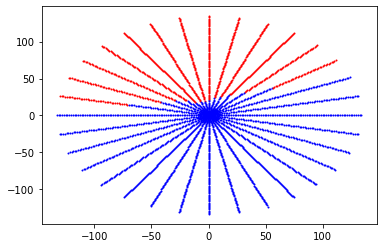

In [229]:
Spectral(1,2,0.5)

shjape = 2
7


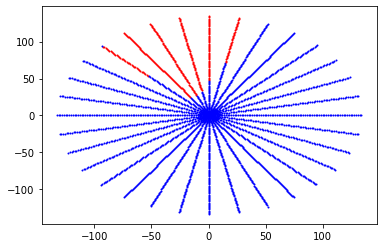

In [230]:
Spectral(1,2,1)

shjape = 3
5


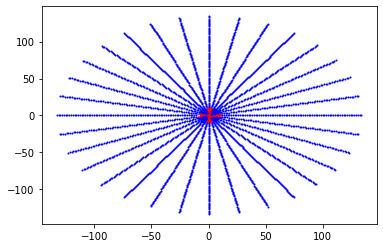

In [231]:
Spectral(1,3,10)

shjape = 2
5


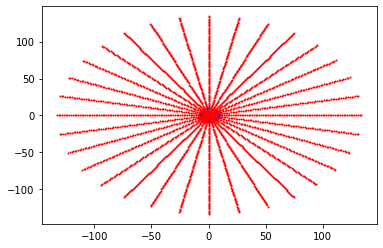

In [232]:
Spectral(1,2,20)

In [ ]:
# Spectral(1,3,0.1)

In [ ]:
# Spectral(1,3,0.01)